In [1]:
from req import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atliu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Preparation

In [2]:
positive_df = pd.read_pickle('raw_positive.pkl')
negative_df = pd.read_pickle('raw_negative.pkl')

In [3]:
df = pd.concat([positive_df,negative_df], axis=0, ignore_index=True)
df.head()

,Comment,Rate,Seller,Date
0,NaN,5,,2024-02-22
1,NaN,5,,2024-02-19
2,NaN,5,,2024-02-19
3,NaN,4,,2024-02-17
4,NaN,5,,2024-02-16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58406 entries, 0 to 58405
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  29569 non-null  object
 1   Rate     58406 non-null  object
 2   Seller   58377 non-null  object
 3   Date     58406 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [5]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['Date'] = df['Date'].apply(time_it)
df['Rate'] = df['Rate'].apply(pd.to_numeric)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21087 entries, 6 to 50915
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Comment  21087 non-null  object        
 1   Rate     21087 non-null  int64         
 2   Seller   21087 non-null  object        
 3   Date     21087 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 823.7+ KB


In [7]:
bins = [0, 3, 5]
labels = [0, 1]
df['Normal_Rate'] = pd.cut(df['Rate'], bins=bins, labels=labels)
df.head()

,Comment,Rate,Seller,Date,Normal_Rate
6,bu üründen 2 tane eskittim. yeterli ve güzel b...,5,,2024-02-16,1
9,Ürün sahte çıktı. Orjinallerde şarj kablosunda...,5,,2024-02-07,1
14,Kulaklığı Eylül 2021’den beri kullanıyorum ger...,5,,2024-01-30,1
15,"2 sene sonra 1 tanesi şarj tutmadı, hemen pili...",4,,2024-01-24,1
17,İdare eder,5,,2024-01-23,1


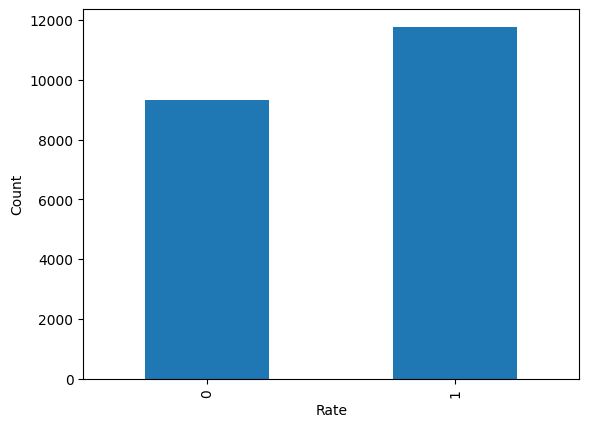

In [8]:
df.groupby(['Normal_Rate']).size().plot(kind='bar',ylabel='Count', xlabel='Rate');

In [9]:
#This is not necessary, but I want a balanced data. There are several ways to do this, but I want to do this.
counts = df.groupby(['Normal_Rate']).size()
drop_count = counts.values[1] - counts.values[0]
df.drop(index=(random.choices(df.index[df['Normal_Rate'] == 1].to_list(), k=drop_count)), inplace=True)
df.reset_index()

,index,Comment,Rate,Seller,Date,Normal_Rate
0,6,bu üründen 2 tane eskittim. yeterli ve güzel b...,5,,2024-02-16,1
1,14,Kulaklığı Eylül 2021’den beri kullanıyorum ger...,5,,2024-01-30,1
2,15,"2 sene sonra 1 tanesi şarj tutmadı, hemen pili...",4,,2024-01-24,1
3,17,İdare eder,5,,2024-01-23,1
4,18,Zaten kullandığım bir ürün .. eşime ve arkadaş...,5,,2024-01-22,1
...,...,...,...,...,...,...
18852,50908,"Herkese Merhaba ,\n\nMüzik ve ses deneğimi kon...",5,Hepsiburada,2022-01-18,1
18853,50909,Ürün elime Zamanında ulaştı Teşekkür ediyorum ...,5,Güneş Elektronik,2022-05-26,1
18854,50911,Alınabilecek en güzel Bluetooth kulaklık.\nSes...,5,Hepsiburada,2022-07-03,1
18855,50913,Kulaklık gerçekten çok kaliteli. Ürün kaliteli...,5,Hepsiburada,2022-11-23,1


In [10]:
#Preproces can be run with stemmer or without it. It works without stemmer by default. 
#Appying stemmer, increases preprocess time, but decreases model accuracy and model training time.
#For future, with better stemmer or lemmetizer, model can be improved. 
df['Text'] = df['Comment'].apply(preproces)
df[['Comment', 'Text', 'Normal_Rate']]

,Comment,Text,Normal_Rate
6,bu üründen 2 tane eskittim. yeterli ve güzel b...,üründen tane eskittim yeterli güzel bir ürün ...,1
14,Kulaklığı Eylül 2021’den beri kullanıyorum ger...,kulaklığı eylül ’den beri kullanıyorum gerçekt...,1
15,"2 sene sonra 1 tanesi şarj tutmadı, hemen pili...",sene sonra tanesi şarj tutmadı hemen pili bi...,1
17,İdare eder,̇dare eder,1
18,Zaten kullandığım bir ürün .. eşime ve arkadaş...,zaten kullandığım bir ürün eşime arkadaşına a...,1
...,...,...,...
50908,"Herkese Merhaba ,\n\nMüzik ve ses deneğimi kon...",herkese merhaba \n\nmüzik ses deneğimi konusun...,1
50909,Ürün elime Zamanında ulaştı Teşekkür ediyorum ...,ürün elime zamanında ulaştı teşekkür ediyorum ...,1
50911,Alınabilecek en güzel Bluetooth kulaklık.\nSes...,alınabilecek güzel bluetooth kulaklık\nses kal...,1
50913,Kulaklık gerçekten çok kaliteli. Ürün kaliteli...,kulaklık gerçekten kaliteli ürün kaliteli num...,1


In [11]:
df.drop(df.index[df['Text'] == ''], inplace=True)
model_df = df[['Text','Normal_Rate']]
model_df

,Text,Normal_Rate
6,üründen tane eskittim yeterli güzel bir ürün ...,1
14,kulaklığı eylül ’den beri kullanıyorum gerçekt...,1
15,sene sonra tanesi şarj tutmadı hemen pili bi...,1
17,̇dare eder,1
18,zaten kullandığım bir ürün eşime arkadaşına a...,1
...,...,...
50908,herkese merhaba \n\nmüzik ses deneğimi konusun...,1
50909,ürün elime zamanında ulaştı teşekkür ediyorum ...,1
50911,alınabilecek güzel bluetooth kulaklık\nses kal...,1
50913,kulaklık gerçekten kaliteli ürün kaliteli num...,1


# Model Training

In [12]:
word_vectorizer = CountVectorizer(ngram_range=(1, 1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df[df['Normal_Rate'] == 0]['Text'])
frequencies = sum(sparse_matrix).toarray()[0]
freq_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by='frequency', ascending=False)
freq_df['word'] = freq_df.index
freq_df.reset_index(drop=True, inplace=True)
freq_df.head()

,frequency,word
0,3467,ses
1,2996,bir
2,2848,ürün
3,1678,kulaklık
4,1454,iade


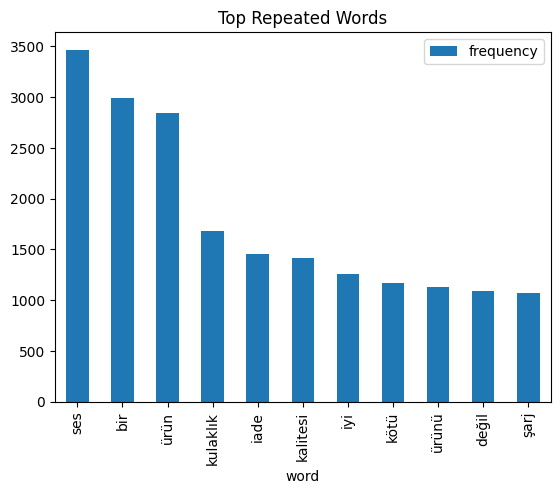

In [16]:
freq_df[freq_df['frequency'] > 1000].plot.bar(x='word', y='frequency', title='Top Repeated Words');

In [17]:
word_vectorizer = CountVectorizer(ngram_range=(1, 1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df[df['Normal_Rate'] == 1]['Text'])
frequencies = sum(sparse_matrix).toarray()[0]
freq_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by='frequency', ascending=False)
freq_df['word'] = freq_df.index
freq_df.reset_index(drop=True, inplace=True)
freq_df.head()

,frequency,word
0,3185,iyi
1,3101,bir
2,2862,ses
3,2823,ürün
4,2578,güzel


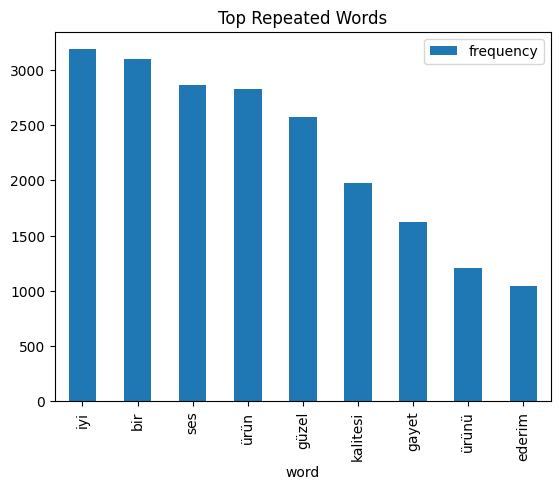

In [18]:
freq_df[freq_df['frequency'] > 1000].plot.bar(x='word', y='frequency', title='Top Repeated Words');

In [19]:
word_vectorizer = CountVectorizer(ngram_range=(2, 2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df[df['Normal_Rate'] == 0]['Text'])
frequencies = sum(sparse_matrix).toarray()[0]
freq_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by='frequency', ascending=False)
freq_df['word'] = freq_df.index
freq_df.reset_index(drop=True, inplace=True)
freq_df.head()

,frequency,word
0,899,ses kalitesi
1,428,tavsiye etmiyorum
2,378,iade ettim
3,363,bir ürün
4,358,karşı tarafa


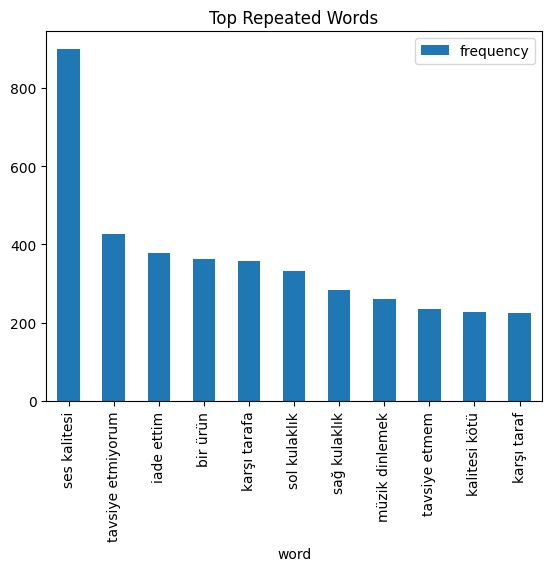

In [20]:
freq_df[freq_df['frequency'] > 200].plot.bar(x='word', y='frequency', title='Top Repeated Words');

In [21]:
word_vectorizer = CountVectorizer(ngram_range=(2, 2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df[df['Normal_Rate'] == 1]['Text'])
frequencies = sum(sparse_matrix).toarray()[0]
freq_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by='frequency', ascending=False)
freq_df['word'] = freq_df.index
freq_df.reset_index(drop=True, inplace=True)
freq_df.head()

,frequency,word
0,1233,ses kalitesi
1,770,tavsiye ederim
2,766,bir ürün
3,755,fiyat performans
4,563,fiyatına göre


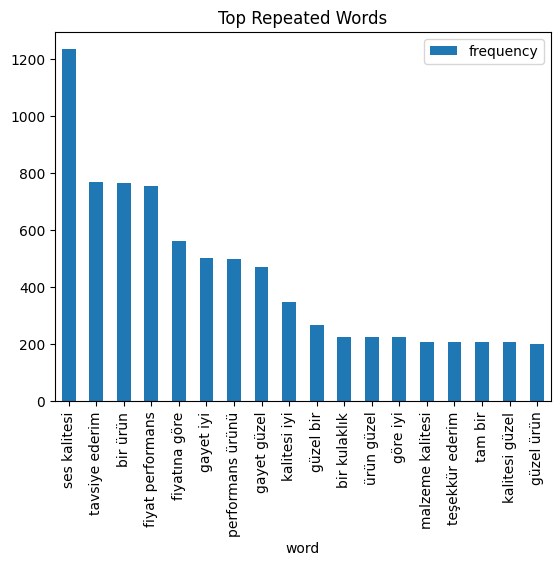

In [22]:
freq_df[freq_df['frequency'] > 200].plot.bar(x='word', y='frequency', title='Top Repeated Words');

In [23]:
word_vectorizer = CountVectorizer(ngram_range=(3, 3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df[df['Normal_Rate'] == 0]['Text'])
frequencies = sum(sparse_matrix).toarray()[0]
freq_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by='frequency', ascending=False)
freq_df['word'] = freq_df.index
freq_df.reset_index(drop=True, inplace=True)
freq_df.head()

,frequency,word
0,125,ses kalitesi kötü
1,104,ses kalitesi iyi
2,101,kesinlikle tavsiye etmiyorum
3,98,karşı tarafa ses
4,89,beş para etmez


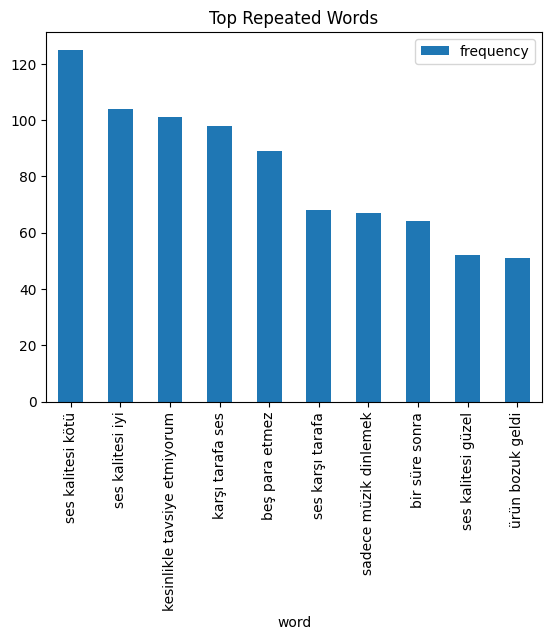

In [25]:
freq_df[freq_df['frequency'] > 50].plot.bar(x='word', y='frequency', title='Top Repeated Words');

In [26]:
word_vectorizer = CountVectorizer(ngram_range=(3, 3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df[df['Normal_Rate'] == 1]['Text'])
frequencies = sum(sparse_matrix).toarray()[0]
freq_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by='frequency', ascending=False)
freq_df['word'] = freq_df.index
freq_df.reset_index(drop=True, inplace=True)
freq_df.head()

,frequency,word
0,481,fiyat performans ürünü
1,226,ses kalitesi iyi
2,177,güzel bir ürün
3,157,fiyatına göre iyi
4,141,ses kalitesi güzel


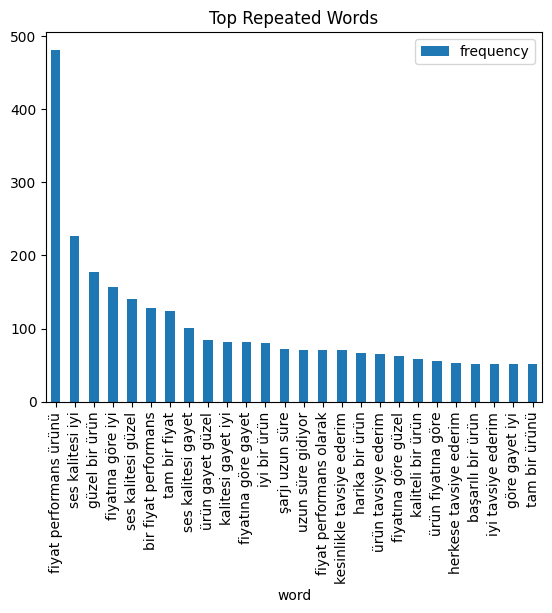

In [27]:
freq_df[freq_df['frequency'] > 50].plot.bar(x='word', y='frequency', title='Top Repeated Words');

In [13]:
train, test = train_test_split(model_df, test_size=0.10, random_state=42)
train_x, train_y = train['Text'], train['Normal_Rate']
test_x, test_y = test['Text'], test['Normal_Rate']

In [14]:
train_y.value_counts()

Normal_Rate
1    15139
0    13787
Name: count, dtype: int64

In [15]:
tfid = TfidfVectorizer()

In [16]:
train_x_vector = tfid.fit_transform(train_x)
test_x_vector = tfid.transform(test_x)

In [17]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfid.get_feature_names_out())

,aaa,aaaa,aaaaaa,aac,aadece,aag,aaçılmıyor,abartarak,abartilacak,abartiyor,...,şıkır,şıkırtı,şımarık,şımdı,şımdıde,şırıl,șarz,șiddetle,șuan,ṣarj
87315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
models = ['SVC', 'DecisionTree', 'LogisticRegression', 'Naive Bayes']
model_scores = []
run_times = []


start_time = time.time()
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)
run_times.append(time.time() - start_time)
model_scores.append(svc.score(test_x_vector, test_y))

start_time = time.time()
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)
run_times.append(time.time() - start_time)
model_scores.append(dec_tree.score(test_x_vector, test_y))

start_time = time.time()
log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)
run_times.append(time.time() - start_time)
model_scores.append(log_reg.score(test_x_vector, test_y))

start_time = time.time()
MNb = MultinomialNB()
MNb.fit(train_x_vector, train_y)
run_times.append(time.time() - start_time)
model_scores.append(MNb.score(test_x_vector, test_y))


chime.success()


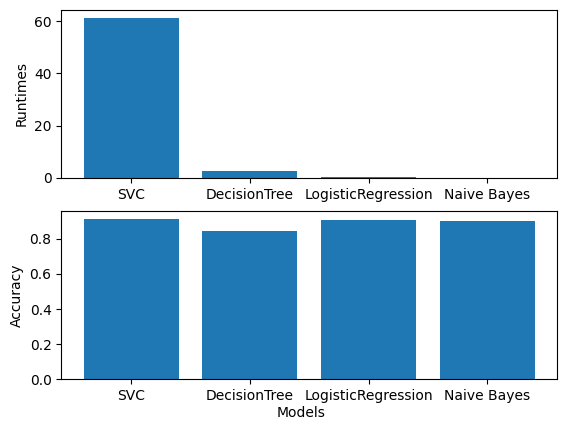

In [19]:
x = np.arange(0, len(models), 1);
fig, ax = plt.subplots(nrows=2, ncols=1)

plt.xticks(x, models);
ax[0].bar(models, run_times);
ax[0].set_ylabel('Runtimes');
plt.sca(ax[0]);
plt.xticks(x, models);

ax[1].bar(models, model_scores);
ax[1].set_ylabel('Accuracy');
plt.sca(ax[1]);
plt.xticks(x, models);

fig.text(0.5, 0.04, 'Models', ha='center', va='center');

In [20]:
run_times[3]

0.0049741268157958984

In [21]:
conf_mat_dec_tree = confusion_matrix(test_y, log_reg.predict(test_x_vector))
conf_mat_dec_tree

array([[1413,  137],
       [ 166, 1499]])

In [22]:
conf_mat_dec_tree = confusion_matrix(test_y, MNb.predict(test_x_vector))
conf_mat_dec_tree

array([[1382,  168],
       [ 155, 1510]])

<Axes: >

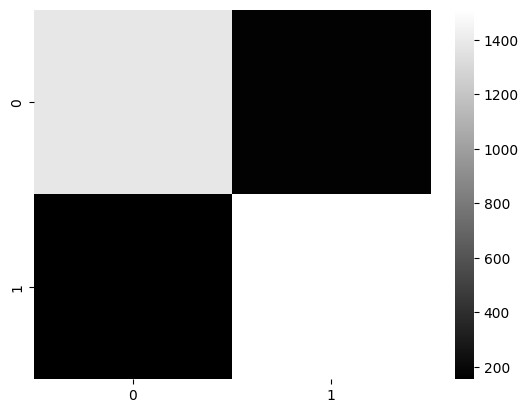

In [23]:
sns.heatmap(conf_mat_dec_tree, cmap='gray')

In [24]:
run_times

[61.27346205711365,
 2.7512028217315674,
 0.294543981552124,
 0.0049741268157958984]

In [25]:
model_scores

[0.9085536547433903,
 0.8441679626749611,
 0.9057542768273716,
 0.8995334370139969]

In [26]:
# For MultinomialNB, alpha is 1.0 by default.
opt = BayesSearchCV(
    MultinomialNB(),
    {'alpha': Real(1e-6, 1e+6, prior='log-uniform')},
    random_state=42)
opt.fit(train_x_vector, train_y)

BayesSearchCV(estimator=MultinomialNB(), random_state=42,
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')})

In [27]:
print("val. score: %s" % opt.best_score_)
print("best params: %s" % opt.best_params_)
print("test score: %s" % opt.score(test_x_vector, test_y))


val. score: 0.8960451971662294
best params: OrderedDict([('alpha', 1.8543350668235166)])
test score: 0.9010886469673406


In [28]:
opt.optimizer_results_

[          fun: -0.8960451971662294
             x: [1.8543350668235166]
     func_vals: [-8.878e-01 -5.234e-01 ... -8.227e-01 -8.601e-01]
       x_iters: [[0.08341564384216595], [11185.625288472094], [0.21776603694820984], [5607.275056505338], [3932.2516133086], [643.1854566491933], [25.406936492978463], [3.317697704417197], [292237.4271599055], [1.10551257524209e-06], [0.00017729125737724494], [0.0033914266318647718], [1.1951388073164376e-05], [8.409214695216157], [0.8856840390872973], [0.018455887335822995], [1.6759336548482187], [0.0007867670584518212], [0.5387649919706414], [3.3266154050790984e-06], [1.4042571452270018], [2.376401833286725], [1.0310694767304363], [64.99914644153664], [4.827280143424323e-05], [4.5060539647740265], [0.7220076403025173], [1.8649913844452795], [1.8543350668235166], [1.5344272524149396], [2.038410579309617], [0.039728875531497045], [0.007885657920737945], [1.4496659135081205], [1.8810497603169583], [998388.872832996], [14.095198834894804], [2.434136896

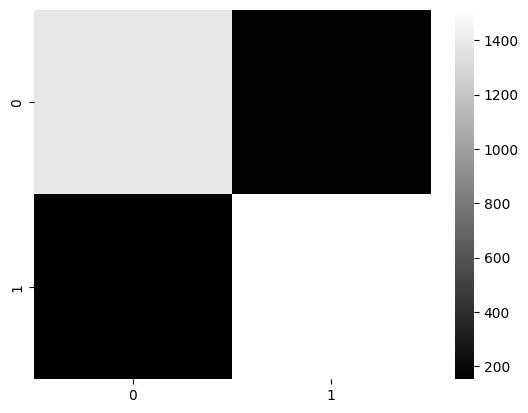

In [29]:
sns.heatmap(confusion_matrix(test_y, opt.predict(test_x_vector)), cmap='gray');

In [30]:
confusion_matrix(test_y, opt.predict(test_x_vector))

array([[1384,  166],
       [ 152, 1513]])